In [1]:
import os
import pandas as pd
species = 'hartebeest'
# note species is huge, so we can load its zip file instead
fname = os.path.join('output', species + '_output.zip')
sdf = pd.read_csv(fname, compression='zip')

In [2]:
# limit to species label only
sdf = sdf[sdf.label=='species']
sdf.head()

,id,label,prediction_top,confidence_top,predictions_all,ID,Species
0,ASG0002zxl,species,hartebeest,0.7227,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",4169,hartebeest
8,ASG0002zxp,species,reedbuck,0.2954,"{'aardvark': '0.0000', 'aardwolf': '0.0001', '...",4172,hartebeest
16,ASG00001ea,species,topi,0.4595,"{'aardvark': '0.0017', 'aardwolf': '0.0016', '...",4466,hartebeest
24,ASG000324g,species,hartebeest,0.9908,"{'aardvark': '0.0000', 'aardwolf': '0.0000', '...",6727,hartebeest
32,ASG0002zzm,species,wildebeest,0.3090,"{'aardvark': '0.0004', 'aardwolf': '0.0004', '...",4202,hartebeest


In [3]:
# top ten predictions for the data
top_ten = sdf.prediction_top.value_counts()[:10]

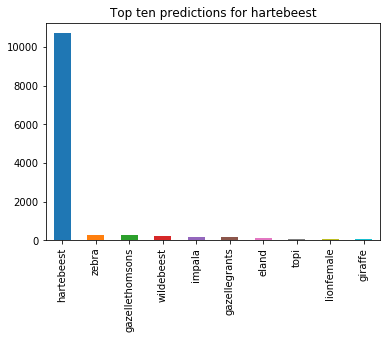

In [5]:
top_ten.plot.bar(title="Top ten predictions for " + species)

In [6]:
prediction_count = sdf.prediction_top.count()
species_count = sdf[sdf.prediction_top==species].prediction_top.count()
print("total predictions=", prediction_count)
print(species, "count=", species_count)
print("percent match=",float(species_count)/prediction_count)

total predictions= 12429
hartebeest count= 10706
percent match= 0.8613725963472524


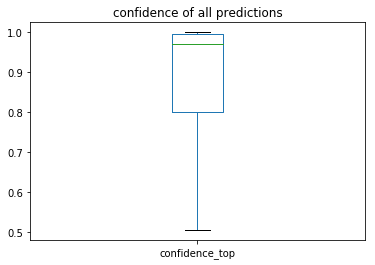

In [7]:
# confidence boxplot
sdf.confidence_top.plot.box(title='confidence of all predictions', showfliers=False)

In [8]:
sdf.confidence_top.describe()

count    12429.000000
mean         0.860169
std          0.205787
min          0.137400
25%          0.799800
50%          0.972000
75%          0.996300
max          1.000000
Name: confidence_top, dtype: float64

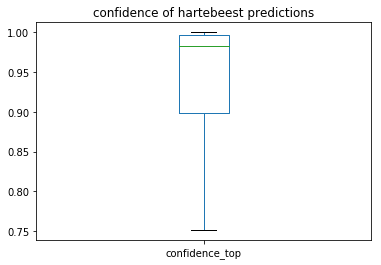

In [9]:
sdf[sdf.prediction_top==species].confidence_top.plot.box(title='confidence of {} predictions'.format(species), showfliers=False)

In [10]:
sdf[sdf.prediction_top==species].confidence_top.describe()

count    10706.000000
mean         0.908624
std          0.153018
min          0.151300
25%          0.898825
50%          0.982500
75%          0.997200
max          1.000000
Name: confidence_top, dtype: float64